In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

characters = pd.read_csv("https://raw.githubusercontent.com/woodnathan/MarioKart8-Stats/master/characters.csv")
bodies = pd.read_csv("https://raw.githubusercontent.com/woodnathan/MarioKart8-Stats/master/bodies.csv")
tires = pd.read_csv("https://raw.githubusercontent.com/woodnathan/MarioKart8-Stats/master/tires.csv")
gliders = pd.read_csv("https://raw.githubusercontent.com/woodnathan/MarioKart8-Stats/master/gliders.csv")

In [52]:
mul_cha = characters
mul_cha = mul_cha.drop(['Speed (Water)', 'Speed (Air)', 'Speed (Ground)', 'Handling (Water)', 'Handling (Air)', 'Handling(Ground)', 'Class'], axis = 'columns')
mul_tire = tires
mul_tire = mul_tire.drop(['Speed (Water)', 'Speed (Air)', 'Speed (Ground)', 'Handling (Water)', 'Handling (Air)', 'Handling(Ground)', 'Type'], axis = 'columns')
mul_body = bodies
mul_body = mul_body.drop(['Speed (Water)', 'Speed (Air)', 'Speed (Ground)', 'Handling (Water)', 'Handling (Air)', 'Handling(Ground)', 'Type'], axis = 'columns')

Index1, Index2, Index3 = list(mul_cha.loc[:,'Character']), list(mul_body.loc[:,'Body']), list(mul_tire.loc[:,'Body'])
Index = pd.MultiIndex.from_product([Index1, Index2, Index3], names = ['Character', 'Body', 'Tire'])
Column = ['Speed', 'Acceleration', 'Weight', 'Handling', 'Traction', 'Mini Turbo']
data_ = mul_cha

mul_full = pd.DataFrame(data = 0, index = Index, columns = Column)
for x in Index1:
    for y in Index2:
        for z in Index3:
            a = mul_cha.drop(['Character'], axis = 'columns'); b = mul_body.drop(['Body'], axis = 'columns'); c = mul_tire.drop(['Body'], axis = 'columns')
            num_a = Index1.index(x); num_b = Index2.index(y); num_c = Index3.index(z)
            mul_full.loc[x,y,z] = a.iloc[num_a] + b.iloc[num_b] + c.iloc[num_c]
mul_full

Speed  Acceleration  Weight  Handling  \
Character  Body          Tire                                                   
Baby Mario Standard Kart Standard        2.25          3.25    2.25      4.75   
                         Blue Standard   2.25          3.25    2.25      4.75   
                         Offroad         2.25          3.25    2.25      4.75   
                         Retro Offroad   2.25          3.25    2.25      4.75   
                         Monster         2.25          3.25    1.75      4.00   
...                                       ...           ...     ...       ...   
Mii Heavy  Wild Wiggler  Metal           5.00          2.50    4.75      5.25   
                         Gold            5.00          2.50    4.75      5.25   
                         Wood            4.55          2.50    5.00      5.00   
                         Sponge          4.55          2.50    5.00      5.00   
                         Cushion         4.55          2.50    5.00      5.00   

                                        Traction  Mini Turbo  
Character  Body          Tire                                 
Baby Mario Standard Kart Standard           4.50        3.00  
                         Blue Standard      4.50        3.00  
                         Offroad            4.50        3.00  
                         Retro Offroad      4.50        3.00  
                         Monster            5.25        3.00  
...                                          ...         ...  
Mii Heavy  Wild Wiggler  Metal              2.25        2.00  
                         Gold               2.25        2.00  
                         Wood               3.25        2.75  
                         Sponge             3.25        2.75  
                         Cushion            3.25        2.75  

[14400 rows x 6 columns]

In [53]:
print("가능한 선택조합의 수: ", mul_full.shape[0])
print()
Unique = mul_full.drop_duplicates()
print("중복된 선택조합의 수: ", mul_full.shape[0] - Unique.shape[0])
print()
print("number of unique configurations: ", Unique.shape[0])
print()
Unique

가능한 선택조합의 수:  14400

중복된 선택조합의 수:  14106

number of unique configurations:  294



Speed  Acceleration  Weight  Handling  \
Character  Body          Tire                                              
Baby Mario Standard Kart Standard   2.25          3.25    2.25      4.75   
                         Monster    2.25          3.25    1.75      4.00   
                         Slick      2.75          3.00    2.50      4.75   
                         Roller     1.75          4.25    1.75      5.00   
                         Slim       2.50          3.50    2.25      5.00   
...                                  ...           ...     ...       ...   
Wario      Sports Bike   Slick      5.25          2.50    4.75      5.50   
                         Roller     4.25          3.75    4.00      5.75   
                         Slim       5.00          3.00    4.50      5.75   
                         Metal      5.00          3.00    4.00      5.50   
                         Wood       4.55          3.00    4.25      5.25   

                                   Traction  Mini Turbo  
Character  Body          Tire                            
Baby Mario Standard Kart Standard      4.50        3.00  
                         Monster       5.25        3.00  
                         Slick         3.50        3.25  
                         Roller        4.25        4.50  
                         Slim          4.00        3.00  
...                                     ...         ...  
Wario      Sports Bike   Slick         1.00        2.50  
                         Roller        1.75        3.75  
                         Slim          1.50        2.25  
                         Metal         1.50        2.25  
                         Wood          2.50        3.00  

[294 rows x 6 columns]

In [54]:
def is_pareto_front(row, xlabel, ylabel, zlabel, ulabel, vlabel, wlabel):
    
    x = row[xlabel]
    y = row[ylabel]
    z = row[zlabel]
    u = row[ulabel]
    v = row[vlabel]
    w = row[wlabel]
    
    # look for points with the same y value but larger x value
    is_max_x = mul_full.loc[mul_full[ylabel]==y].max()[xlabel] <= x
    # look for points with the same x value but larger y value
    is_max_y = mul_full.loc[mul_full[xlabel]==x].max()[ylabel] <= y
    is_max_z = mul_full.loc[mul_full[zlabel]==z].max()[zlabel] <= z
    is_max_u = mul_full.loc[mul_full[ulabel]==u].max()[ulabel] <= u
    is_max_v = mul_full.loc[mul_full[vlabel]==v].max()[vlabel] <= v
    is_max_w = mul_full.loc[mul_full[wlabel]==w].max()[wlabel] <= w
    # look for points that are larger in both x and y
    is_double = len(mul_full.loc[(mul_full[xlabel]>x) & (mul_full[ylabel]>y) & (mul_full[zlabel]>z) & (mul_full[ulabel]>u) & (mul_full[vlabel]>v) & (mul_full[wlabel]>w)])==0
    
    return is_max_x and is_max_y and is_double and is_max_z and is_max_u and is_max_v and is_max_w


In [55]:
# returns True if the row is at the pareto frontier for variables xlabel and ylabel
def SA_is_pareto_front(row, xlabel, ylabel):
    
    x = row[xlabel]
    y = row[ylabel]
    
    # look for points with the same y value but larger x value
    is_max_x = Unique.loc[Unique[ylabel]==y].max()[xlabel] <= x
    # look for points with the same x value but larger y value
    is_max_y = Unique.loc[Unique[xlabel]==x].max()[ylabel] <= y
    # look for points that are larger in both x and y
    is_double = len(Unique.loc[(Unique[xlabel]>x) & (Unique[ylabel]>y)])==0
    
    return is_max_x and is_max_y and is_double

In [56]:
def U_is_pareto_front(row, xlabel, ylabel, zlabel, ulabel, vlabel, wlabel):
    
    x = row[xlabel]
    y = row[ylabel]
    z = row[zlabel]
    u = row[ulabel]
    v = row[vlabel]
    w = row[wlabel]
    
    # look for points with the same y value but larger x value
    is_max_x = Unique.loc[Unique[ylabel]==y].max()[xlabel] <= x
    # look for points with the same x value but larger y value
    is_max_y = Unique.loc[Unique[xlabel]==x].max()[ylabel] <= y
    is_max_z = Unique.loc[Unique[zlabel]==z].max()[zlabel] <= z
    is_max_u = Unique.loc[Unique[ulabel]==u].max()[ulabel] <= u
    is_max_v = Unique.loc[Unique[vlabel]==v].max()[vlabel] <= v
    is_max_w = Unique.loc[Unique[wlabel]==w].max()[wlabel] <= w
    # look for points that are larger in both x and y
    is_double = len(Unique.loc[(Unique[xlabel]>x) & (Unique[ylabel]>y) & (Unique[zlabel]>z) & (Unique[ulabel]>u) & (Unique[vlabel]>v) & (Unique[wlabel]>w)])==0
    
    return is_max_x and is_max_y and is_double and is_max_z and is_max_u and is_max_v and is_max_w


In [58]:
uIndex1 = ['Baby Mario', 'Toad', 'Peach', 'Mario', 'Donkey Kong', 'Metal Mario', 'Wario']
uIndex2 = ['Standard Kart', 'Gold Standard', 'Bandwagon', 'Biddybuggy', 'Pipe Frame', 'Sports Bike']
uIndex3 = ['Standard', 'Monster', 'Slick', 'Roller', 'Slim', 'Metal', 'Wood']
Pareto_combination = 0
for x in Index1:
    for y in Index2:
        for z in Index3:
            tmp = is_pareto_front(mul_full.loc[(x, y, z)], 'Speed', 'Acceleration', 'Weight', 'Handling', 'Traction', 'Mini Turbo')
            if tmp == True:
                Pareto_combination += 1
                
print("전체 데이터 중 파레토 효율적인 선택조합의 수: ", Pareto_combination)

전체 데이터 중 파레토 효율적인 선택조합의 수:  798


In [57]:
UPareto_combination = 0
Upareto = pd.DataFrame()
for x in uIndex1:
    for y in uIndex2:
        for z in uIndex3:
            tmp = U_is_pareto_front(Unique.loc[(x, y, z)], 'Speed', 'Acceleration', 'Weight', 'Handling', 'Traction', 'Mini Turbo')
            if tmp == True:
                Upareto = Upareto.append(Unique.loc[(x,y,z)])
                UPareto_combination += 1
print("중복 스탯 제거 후 파레토 효율적인 선택조합의 수: ", UPareto_combination)

중복 스탯 제거 후 파레토 효율적인 선택조합의 수:  20


In [59]:

uPareto_combination = 0
upareto = pd.DataFrame()
for x in uIndex1:
    for y in uIndex2:
        for z in uIndex3:
            tmp = SA_is_pareto_front(Unique.loc[(x, y, z)], 'Speed', 'Acceleration')
            if tmp == True:
                upareto = upareto.append(Unique.loc[(x,y,z)])
                uPareto_combination += 1
print("중복 스탯 제거 후 Speed와 Acceleration을 고려한 파레토 효율적인 선택조합의 수: ", uPareto_combination)

중복 스탯 제거 후 Speed와 Acceleration을 고려한 파레토 효율적인 선택조합의 수:  16


<AxesSubplot:>

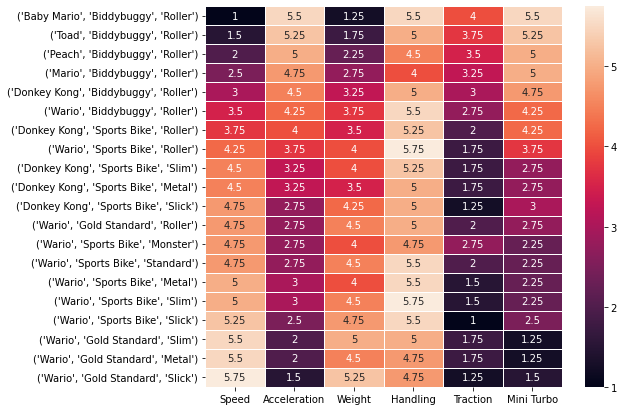

In [60]:
Upareto = Upareto.sort_values('Speed', ascending = 'False')

fig, ax = plt.subplots(1,1, figsize=(8,7))
sns.heatmap(Upareto, annot=True, ax=ax, linewidth=1, fmt='.3g')

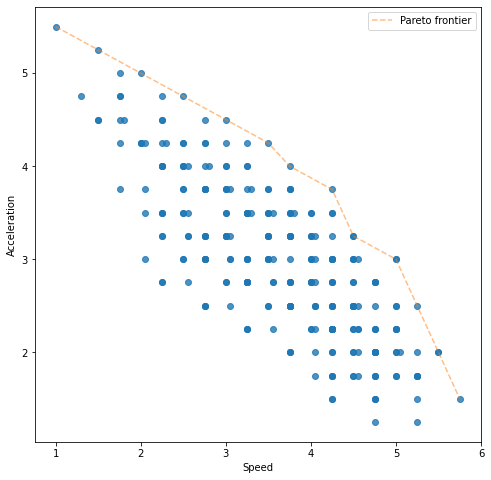

In [61]:
upareto = upareto.sort_values('Speed', ascending = 'False')
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.regplot(x='Speed', y='Acceleration', data=Unique, fit_reg=False, ax=ax)
            

plt.plot(upareto['Speed'], upareto['Acceleration'], '--', label='Pareto frontier', alpha=0.5)

plt.xlim([0.75,6]);
plt.legend(loc='best');

Speed와 Acceleration을 고려한 이유는 시각화를 했을 때 해당 두 스탯에서의 음의 상관관계가 가장 잘 나타났기 때문이다.
게임적인 측면에서도, 속도와 가속도의 음의 상관관계가 성립해야 캐릭터 선택 조합의 밸런스가 맞게 된다.